# DestinE ClimateDT data access with AQUA

Here we present a simple example of data access of ClimateDT phase1 experiment using the AQUA code. Some further hint of operations that can be done with AQUA is presented, although the execution of such operations may require HPC resources and a Dask cluster.

## Exploring the available catalog

As a first step we want to be sure that the catalog is correctly installed and we want to be able to explore its content. Please be sure to have followed the steps in the `aqua_installation_and_setup.md` file before proceeding.

We first import the necessary classes and functions from the AQUA package.
`Reader` is the core of the AQUA package, responsible for data access and enabling the processing capabilities of the framework (regrid, area selection, time averages, etc.).
`inspect_catalog` is a utility function to explore the available catalogs and their contents.

In [1]:
from aqua import Reader, inspect_catalog

/opt/homebrew/Caskroom/miniconda/base/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We first explore the `climatedt-phase1` content.
The AQUA catalog is organized in a hierarchical structure, allowing users to navigate through different levels of data granularity.
These levels are:
- **catalog**: here set as `climatedt-phase1`, but others are available (NextGEMS data, in the future new phases, etc.). Explore the [Catalog repository](https://github.com/DestinE-Climate-DT/Climate-DT-catalog) for a full overview.
- **model**: here representing the models used in the ClimateDT project (`ICON`, `IFS-NEMO`, `IFS-FESOM`).
- **exp**: human-readable name of the experiment (e.g. `historical-1990`)
- **source**: it represent a single xarray dataset, usually a realm, resolution and frequency of the data (e.g. `hourly-hpz10-atm2d`)

The `inspect_catalog` function can be feed with any number of this levels to explore the catalog in more detail.

In [2]:
inspect_catalog(catalog_name='climatedt-phase1')

Models available in catalog climatedt-phase1:


['IFS-NEMO', 'IFS-FESOM', 'ICON']

In [3]:
inspect_catalog(catalog_name='climatedt-phase1', model='IFS-NEMO')

Experiments available in catalog climatedt-phase1 for model IFS-NEMO:


['historical-1990', 'ssp370', 'control-1990']

In [4]:
inspect_catalog(catalog_name='climatedt-phase1', model='IFS-NEMO', exp='historical-1990')

Sources available in catalog climatedt-phase1 for model IFS-NEMO and exp historical-1990:


['hourly-native-atm2d',
 'hourly-native-atm3d',
 'hourly-hpz7-atm2d',
 'hourly-hpz7-atm3d',
 'hourly-hpz10-atm2d',
 'hourly-hpz10-atm3d',
 'hourly-r025-atm2d',
 'hourly-r025-atm3d',
 'daily-native-oce2d',
 'daily-native-oce3d',
 'daily-r025-oce2d',
 'daily-r025-oce3d',
 'daily-hpz7-oce2d',
 'daily-hpz10-oce2d',
 'daily-hpz7-oce3d',
 'daily-hpz10-oce3d',
 'lra-r100-monthly',
 'lra-r100-daily',
 'aqua-timeseries-monthly',
 'aqua-timeseries-annual',
 'aqua-atmglobalmean',
 'aqua-zonalmean']

Note: not all the sources here shown are available for online retrieval.
Some sources as the `lra-r100-monthly` are internal products stored in the original HPC.

## Retrieving a ClimateDT Dataset

Let's then try to open the historical run for the `IFS-NEMO` model.
By default AQUA will enable the area weighting capabilities, requiring you to have the grids downloaded in your machine. If you skip this step, please set `areas=False`.

In order to retrieve a Dask-enabled lazy xarray Dataset for all the 2d atmospheric variables at all the available timesteps for the selected experiment it will be enough to initializating a `Reader` instance with the appropriate parameters.

We have to set also the `engine` argument to `polytope` to specify that we want to access data remotely and not trough access to the HPC FDB.

In [5]:
reader = Reader(catalog='climatedt-phase1', model='IFS-NEMO',
                exp='historical-1990', source='hourly-hpz10-atm2d', engine='polytope')
# set areas to False if you don't have the grid files

2025-09-04 12:18:45 :: Reader :: WARNING  -> LRA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/appl/local/climatedt/data/AQUA/LRA
2025-09-04 12:18:45 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default /pfs/lustrep3/appl/local/climatedt
2025-09-04 12:18:45 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default /project/project_465000454/experiments/a0h3
2025-09-04 12:18:45 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default /scratch/project_465000542/experiments/a14c
2025-09-04 12:18:45 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default /pfs/lustrep3/appl/local/climatedt/data/AQUA/eccodes
2025-09-04 12:18:45 :: Reader :: WARNING  -> OUTPUT_AQUA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/pre_comput

The initialization is not enough to have the desired dataset. We need to use the retrieve method to actually load the data.

In [6]:
data = reader.retrieve()

2025-09-04 12:18:47 - INFO - Key read from /Users/mnurisso/.polytopeapirc
2025-09-04 12:18:47 - INFO - Sending request...
{'request': 'activity: CMIP6\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            'date:\n'
            "- '19900101'\n"
            'experiment: hist\n'
            "expver: '0001'\n"
            'generation: 1\n'
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param:\n'
            "- '78'\n"
            "- '79'\n"
            "- '134'\n"
            "- '137'\n"
            "- '141'\n"
            "- '148'\n"
            "- '151'\n"
            "- '159'\n"
            "- '164'\n"
            "- '165'\n"
            "- '166'\n"
            "- '167'\n"
            "- '168'\n"
            "- '186'\n"
            "- '187'\n"
            "- '188'\n"
            "- '235'\n"
            "- '8'\n"
            "- '9'\n"
            "- '144'\n"
            "- '146'\n"
            "- '147'\n"
            "- '169'\n"
         

We can now inspect the retrieved data.
This is a dataset with all the available atmospheric 2d variables, for all the timesteps.
As you can see, operations done to the dataset are documented in the `history` attribute of the dataset, or in the individual variable attributes if units or names are changed.

In [7]:
data

<xarray.Dataset> Size: 354TB
Dimensions:   (ncells: 12582912, time: 106608)
Coordinates:
    lon       (ncells) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
    lat       (ncells) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
  * time      (time) datetime64[ns] 853kB 1990-01-01 ... 2002-02-28T23:00:00
Dimensions without coordinates: ncells
Data variables: (12/33)
    tclw      (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    tciw      (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    sp        (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    tcwv      (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    sd        (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    chnk      (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    ...        ...
    tnlwrf    (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    iews      (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    inss      (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    ie        (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    tdswrf    (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
    tprate    (time, ncells) float64 11TB dask.array<chunksize=(24, 12582912), meta=np.ndarray>
Attributes:
    history:  \n2025-09-04 12:19:49 AQUA💧: Retrieved from IFS-NEMO_historical...

### Some info on useful `Reader` and `retrieve` arguments

The `Reader` has been initialized with the minimal set of arguments but extra capabilities are available:

- **fix**: this key is true by default and it is converting the metadata to the GRIB2 standard. For example cumulated variables are decumulated. While this is almost transparent for the ClimateDT data, it can be very useful when working with other datasets. Notice that some shortnames are modified (e.g. avg_tprate is tprate only). More info in the [documentation](https://aqua.readthedocs.io/en/latest/fixer.html)
- **regrid**: this key can be set to enable regrid towards a target grid. CDO standard syntax is supported, as detailed in the [AQUA documentation](https://aqua.readthedocs.io/en/latest/regrid.html)
- **chunks**: by default each Polytope catalog has a default chunking. This is used as minimal amount of data to download when a new request is sent (e.g. daily chunking for the hourly source we opened). Other chunking can be specified with this argument. This is particurarly useful if you want to optimize the performance of your data retrieval with a Dask cluster.

The `retrieve` method has as well some useful argument:

- **var (str, list)**: this key allows you to specify the variable(s) you want to retrieve from the dataset. You can provide a single variable name as a string or multiple variable names as a list of strings. This may speed up the data retrieval if you know already which variables you need.
- **level (list, float, int)**: this key allows you to specify the vertical level(s) you want to retrieve from the dataset. You can provide a single level as a float or int, or multiple levels as a list of floats or ints. This will retrieve only the data for the specified level(s). It will raise an error if the selected level is not available.
- **startdate and enddate (str)**: these keys allow you to specify the time range you want to retrieve from the dataset. You can provide a single date as a string in the format 'YYYY-MM-DD', or a range of dates as two strings. This will retrieve only the data for the specified time range.

## Plot a variable

Let's now use the data we retrieved to plot a timestep of a variable.
AQUA provides a set of [graphic tools](https://aqua.readthedocs.io/en/latest/graphics.html).
In particular a function able to plot both regular and healpix grids is avaible.

In [8]:
from aqua.graphics import plot_single_map

We select a timestep not from the initial sample. This will trigger automatically a new Polytope request without any effort required by the user.

In [10]:
data['2t'].sel(time=("1991-01-01T00:00:00"))

<xarray.DataArray '2t' (ncells: 12582912)> Size: 101MB
dask.array<getitem, shape=(12582912,), dtype=float64, chunksize=(12582912,), chunktype=numpy.ndarray>
Coordinates:
    lon      (ncells) float64 101MB 45.0 45.04 44.96 45.0 ... 315.0 315.0 315.0
    lat      (ncells) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    time     datetime64[ns] 8B 1991-01-01
Dimensions without coordinates: ncells
Attributes: (12/40)
    long_name:                       2 metre temperature
    units:                           K
    standard_name:                   air_temperature
    model:                           IFS-NEMO
    activity:                        CMIP6
    stream:                          clte
    ...                              ...
    cfVarName:                       t2m
    AQUA_model:                      IFS-NEMO
    AQUA_exp:                        historical-1990
    AQUA_source:                     hourly-hpz10-atm2d
    AQUA_catalog:                    climatedt-phase1
    AQUA_version:                    0.18.0-alpha

2025-09-04 12:20:36 - INFO - Key read from /Users/mnurisso/.polytopeapirc
2025-09-04 12:20:36 - INFO - Sending request...
{'request': 'activity: CMIP6\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            'date:\n'
            "- '19910101'\n"
            'experiment: hist\n'
            "expver: '0001'\n"
            'generation: 1\n'
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param:\n'
            "- '167'\n"
            'realization: 1\n'
            'resolution: high\n'
            'step:\n'
            "- '0'\n"
            'stream: clte\n'
            'time:\n'
            "- '0000'\n"
            "- '0100'\n"
            "- '0200'\n"
            "- '0300'\n"
            "- '0400'\n"
            "- '0500'\n"
            "- '0600'\n"
            "- '0700'\n"
            '- 0800\n'
            '- 0900\n'
            "- '1000'\n"
            "- '1100'\n"
            "- '1200'\n"
            "- '1300'\n"
            "- '1400'\n"
 

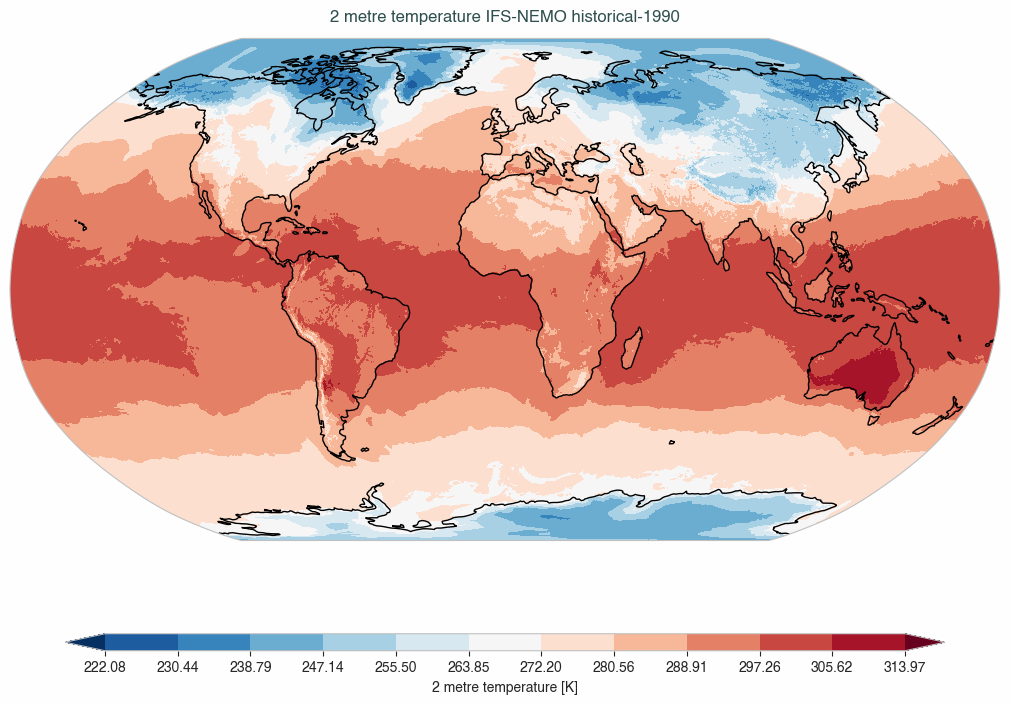

In [11]:
plot_single_map(data['2t'].sel(time=("1991-01-01T00:00:00")))

The execution time can be decreased by using a smaller chunk size when retrieving data from the dataset.
The function by default tries to use metadata to build a title and axis labels for the plot.
Many customization options are available to modify the appearance of the plot (such as colormaps, projection, value limits, etc.)

## Useful `Reader` methods

The `Reader` class has some useful methods to process data:

- `regrid`: This method allows you to regrid the data to a different resolution or grid type (specified in the `Reader` constructor).
- `timmean`: This method (together with other temporal statistics methods) can be used to compute the time mean of the data. It allows to exclude incomplete chunks and uses pandas frequencies definitions.
- `fldmean`: This method can be used to compute the spatial mean of the data. It can select a region and/or apply the average only over one dimension.

Other methods are available for more advanced data processing tasks.
One important note is that every method or AQUA function operates having xarray Dataset or DataArray as input and returns a new Dataset or DataArray as output. This means that it can be seamlessly integrated into a data processing pipeline using standard xarray operations.